<a href="https://colab.research.google.com/github/mhtasnia/DS332-Metarials/blob/main/labReport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# Create the .kaggle directory if it doesn't exist
!mkdir -p ~/.kaggle/

# Create an empty kaggle.json file
!touch ~/.kaggle/kaggle.json

# Define your Kaggle API token as a Python dictionary
api_token = {"username":"Kaggle_username", "key":"kaggle-key"}

# Import the json module to work with JSON data
import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

# Set secure permissions for the kaggle.json file (read/write only for owner)
!chmod 600 ~/.kaggle/kaggle.json

print("Kaggle API credentials have been set up successfully!")

Kaggle API credentials have been set up successfully!


In [30]:
!kaggle datasets download -d laurenainsleyhaines/league-of-legends-champions-season-15-25-13

Dataset URL: https://www.kaggle.com/datasets/laurenainsleyhaines/league-of-legends-champions-season-15-25-13
License(s): CC0-1.0
league-of-legends-champions-season-15-25-13.zip: Skipping, found more recently modified local copy (use --force to force download)


In [31]:
!unzip league-of-legends-champions-season-15-25-13.zip

Archive:  league-of-legends-champions-season-15-25-13.zip
replace 080725_LoL_champion_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: 080725_LoL_champion_data.csv  


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv('080725_LoL_champion_data.csv')
df.head()

,Unnamed: 0,id,apiname,title,difficulty,herotype,alttype,resource,stats,rangetype,...,be,rp,skill_i,skill_q,skill_w,skill_e,skill_r,skills,fullname,nickname
0,Aatrox,266.0,Aatrox,the Darkin Blade,2,Fighter,Tank,Blood Well,"{'hp_base': 650, 'hp_lvl': 114, 'mp_base': 0, ...",Melee,...,2400,880,{1: 'Deathbringer Stance'},"{1: 'The Darkin Blade', 2: 'The Darkin Blade 2...",{1: 'Infernal Chains'},{1: 'Umbral Dash'},{1: 'World Ender'},"{1: 'Deathbringer Stance', 2: 'The Darkin Blad...",NaN,NaN
1,Ahri,103.0,Ahri,the Nine-Tailed Fox,2,Mage,Assassin,Mana,"{'hp_base': 590, 'hp_lvl': 104, 'mp_base': 418...",Ranged,...,1575,790,{1: 'Essence Theft'},{1: 'Orb of Deception'},{1: 'Fox-Fire'},{1: 'Charm'},{1: 'Spirit Rush'},"{1: 'Essence Theft', 2: 'Orb of Deception', 3:...",NaN,NaN
2,Akali,84.0,Akali,the Rogue Assassin,3,Assassin,NaN,Energy,"{'hp_base': 600, 'hp_lvl': 119, 'mp_base': 200...",Melee,...,1575,790,"{1: ""Assassin's Mark""}","{1: 'Five Point Strike', 2: 'Five Point Strike...",{1: 'Twilight Shroud'},"{1: 'Shuriken Flip', 2: 'Shuriken Flip 2'}","{1: 'Perfect Execution', 2: 'Perfect Execution...","{1: ""Assassin's Mark"", 2: 'Five Point Strike',...",Akali Jhomen Tethi,NaN
3,Akshan,166.0,Akshan,the Rogue Sentinel,3,Marksman,Assassin,Mana,"{'hp_base': 630, 'hp_lvl': 107, 'mp_base': 350...",Ranged,...,2400,880,{1: 'Dirty Fighting'},{1: 'Avengerang'},{1: 'Going Rogue'},"{1: 'Heroic Swing', 2: 'Heroic Swing 2'}",{1: 'Comeuppance'},"{1: 'Dirty Fighting', 2: 'Avengerang', 3: 'Goi...",NaN,NaN
4,Alistar,12.0,Alistar,the Minotaur,1,Tank,Support,Mana,"{'hp_base': 685, 'hp_lvl': 120, 'mp_base': 350...",Melee,...,675,585,{1: 'Triumphant Roar'},{1: 'Pulverize'},{1: 'Headbutt'},{1: 'Trample'},{1: 'Unbreakable Will'},"{1: 'Triumphant Roar', 2: 'Pulverize', 3: 'Hea...",NaN,NaN


In [34]:
missing_values_count = df.isnull().sum()
missing_values_count

,0
Unnamed: 0,0
id,0
apiname,0
title,0
difficulty,0
herotype,0
alttype,29
resource,5
stats,0
rangetype,0


In [35]:
df.shape

(173, 33)

In [36]:
total_data = np.prod(df.shape)
missing_data = missing_values_count.sum()
missing_data_percent = (missing_data/total_data) * 100
missing_data_percent

np.float64(5.447538973550534)

In [37]:
print(f'data before dropping{df.shape}')
dropped_df = df.dropna()
print(f'data after dropping{dropped_df.shape}')

data before dropping(173, 33)
data after dropping(7, 33)


In [38]:
col_dropped_df = df.dropna(axis=1)
print(f'data after NULL column dropping{col_dropped_df.shape}')

data after NULL column dropping(173, 28)


In [39]:
row_dropped_df = df.dropna(axis=0)
print(f'data after NULL row dropping{row_dropped_df.shape}')

data after NULL row dropping(7, 33)


In [40]:
col_dropped_df.sample(5)

,Unnamed: 0,id,apiname,title,difficulty,herotype,stats,rangetype,date,patch,...,utility,style,adaptivetype,be,rp,skill_i,skill_q,skill_w,skill_e,skill_r
137,Teemo,17.0,Teemo,the Swift Scout,1,Marksman,"{'hp_base': 615, 'hp_lvl': 104, 'mp_base': 334...",Ranged,2009-02-21,Alpha Week 2,...,2,30,Magic,225,260,{1: 'Guerrilla Warfare'},{1: 'Blinding Dart'},{1: 'Move Quick'},{1: 'Toxic Shot'},{1: 'Noxious Trap'}
124,Sion,14.0,Sion,The Undead Juggernaut,1,Tank,"{'hp_base': 655, 'hp_lvl': 87, 'mp_base': 400,...",Melee,2009-02-21,Alpha Week 2,...,1,65,Physical,675,585,"{1: 'Glory in Death', 2: 'Death Surge'}",{1: 'Decimating Smash'},"{1: 'Soul Furnace', 2: 'Soul Furnace 2'}",{1: 'Roar of the Slayer'},"{1: 'Unstoppable Onslaught', 2: 'Unstoppable O..."
117,Senna,235.0,Senna,the Redeemer,2,Support,"{'hp_base': 530, 'hp_lvl': 89, 'mp_base': 350,...",Ranged,2019-11-10,V9.22,...,3,30,Physical,1575,790,{1: 'Absolution'},{1: 'Piercing Darkness'},{1: 'Last Embrace'},{1: 'Curse of the Black Mist'},{1: 'Dawning Shadow'}
104,Quinn,133.0,Quinn,Demacia's Wings,2,Marksman,"{'hp_base': 565, 'hp_lvl': 107, 'mp_base': 269...",Ranged,2013-03-01,V3.03,...,1,20,Physical,2400,880,{1: 'Harrier'},{1: 'Blinding Assault'},{1: 'Heightened Senses'},{1: 'Vault'},"{1: 'Behind Enemy Lines', 2: 'Skystrike'}"
15,Bel'Veth,200.0,Belveth,the Empress of the Void,2,Fighter,"{'hp_base': 610, 'hp_lvl': 99, 'mp_base': 0, '...",Melee,2022-06-09,V12.11,...,1,0,Physical,1575,790,{1: 'Death in Lavender'},{1: 'Void Surge'},{1: 'Above and Below'},{1: 'Royal Maelstrom'},{1: 'Endless Banquet'}


In [41]:
missing_values_count = col_dropped_df.isnull().sum()
missing_values_count

,0
Unnamed: 0,0
id,0
apiname,0
title,0
difficulty,0
herotype,0
stats,0
rangetype,0
date,0
patch,0


In [42]:
final_df = col_dropped_df

In [43]:
# Get the data types of each column
column_datatypes = final_df.dtypes

# Display the data types
print("Data Types:")
print(column_datatypes)

print("\nExample Row:")
# Display one sample row
display(final_df.sample(1))

Data Types:
Unnamed: 0             object
id                    float64
apiname                object
title                  object
difficulty              int64
herotype               object
stats                  object
rangetype              object
date                   object
patch                  object
changes                object
role                   object
client_positions       object
external_positions     object
damage                  int64
toughness               int64
control                 int64
mobility                int64
utility                 int64
style                   int64
adaptivetype           object
be                      int64
rp                      int64
skill_i                object
skill_q                object
skill_w                object
skill_e                object
skill_r                object
dtype: object

Example Row:


,Unnamed: 0,id,apiname,title,difficulty,herotype,stats,rangetype,date,patch,...,utility,style,adaptivetype,be,rp,skill_i,skill_q,skill_w,skill_e,skill_r
20,Caitlyn,51.0,Caitlyn,the Sheriff of Piltover,1,Marksman,"{'hp_base': 580, 'hp_lvl': 107, 'mp_base': 315...",Ranged,2011-01-04,V1.0.0.108,...,1,10,Physical,225,260,{1: 'Headshot'},{1: 'Piltover Peacemaker'},{1: 'Yordle Snap Trap'},{1: '90 Caliber Net'},{1: 'Ace in the Hole'}


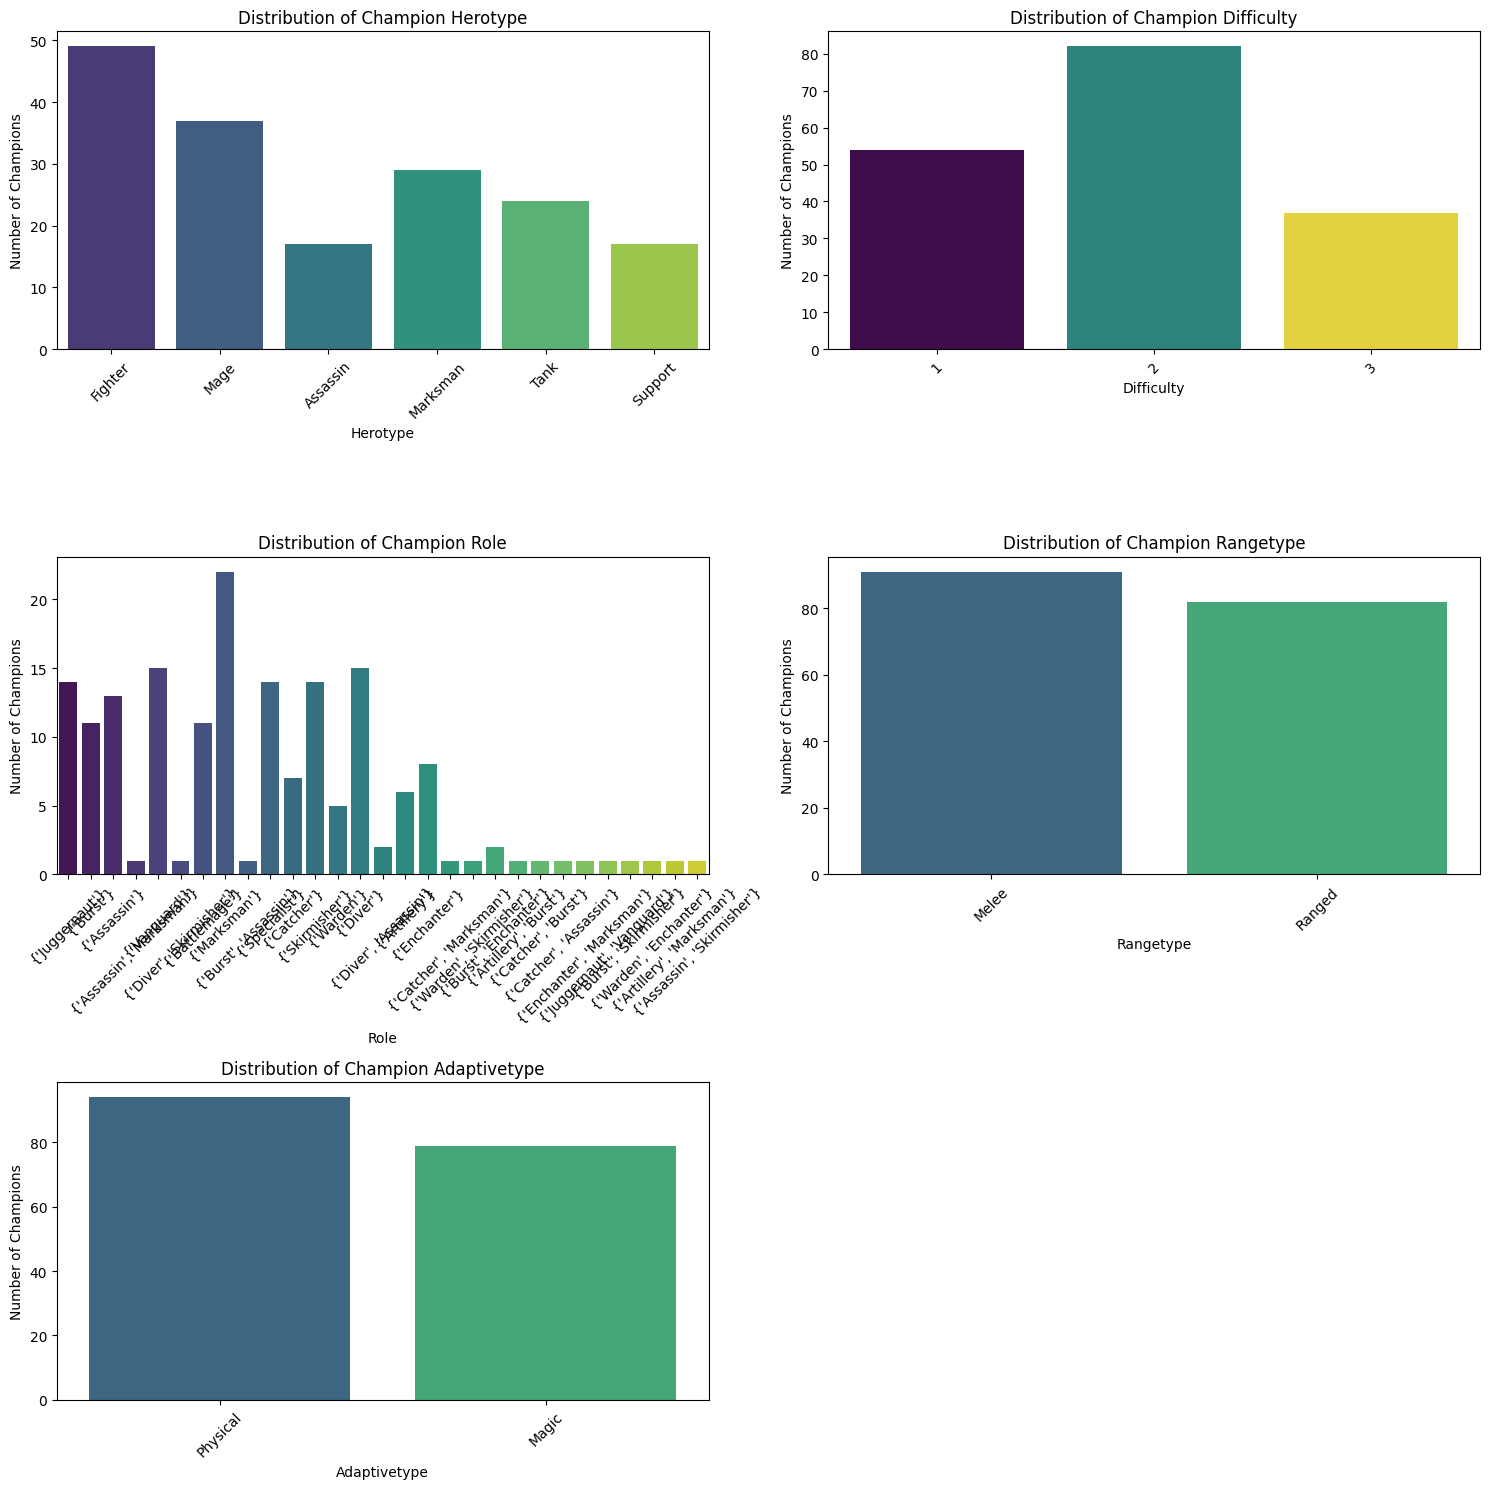

/tmp/ipython-input-1202333344.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=final_df, x='herotype', y=col, palette='viridis', ax=axes_num[i])
/tmp/ipython-input-1202333344.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=final_df, x='herotype', y=col, palette='viridis', ax=axes_num[i])
/tmp/ipython-input-1202333344.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=final_df, x='herotype', y=col, palette='viridis', ax=axes_num[i])
/tmp/ipython-input-1202333344.py:41: FutureWarning: 

Passing `palette` without assig

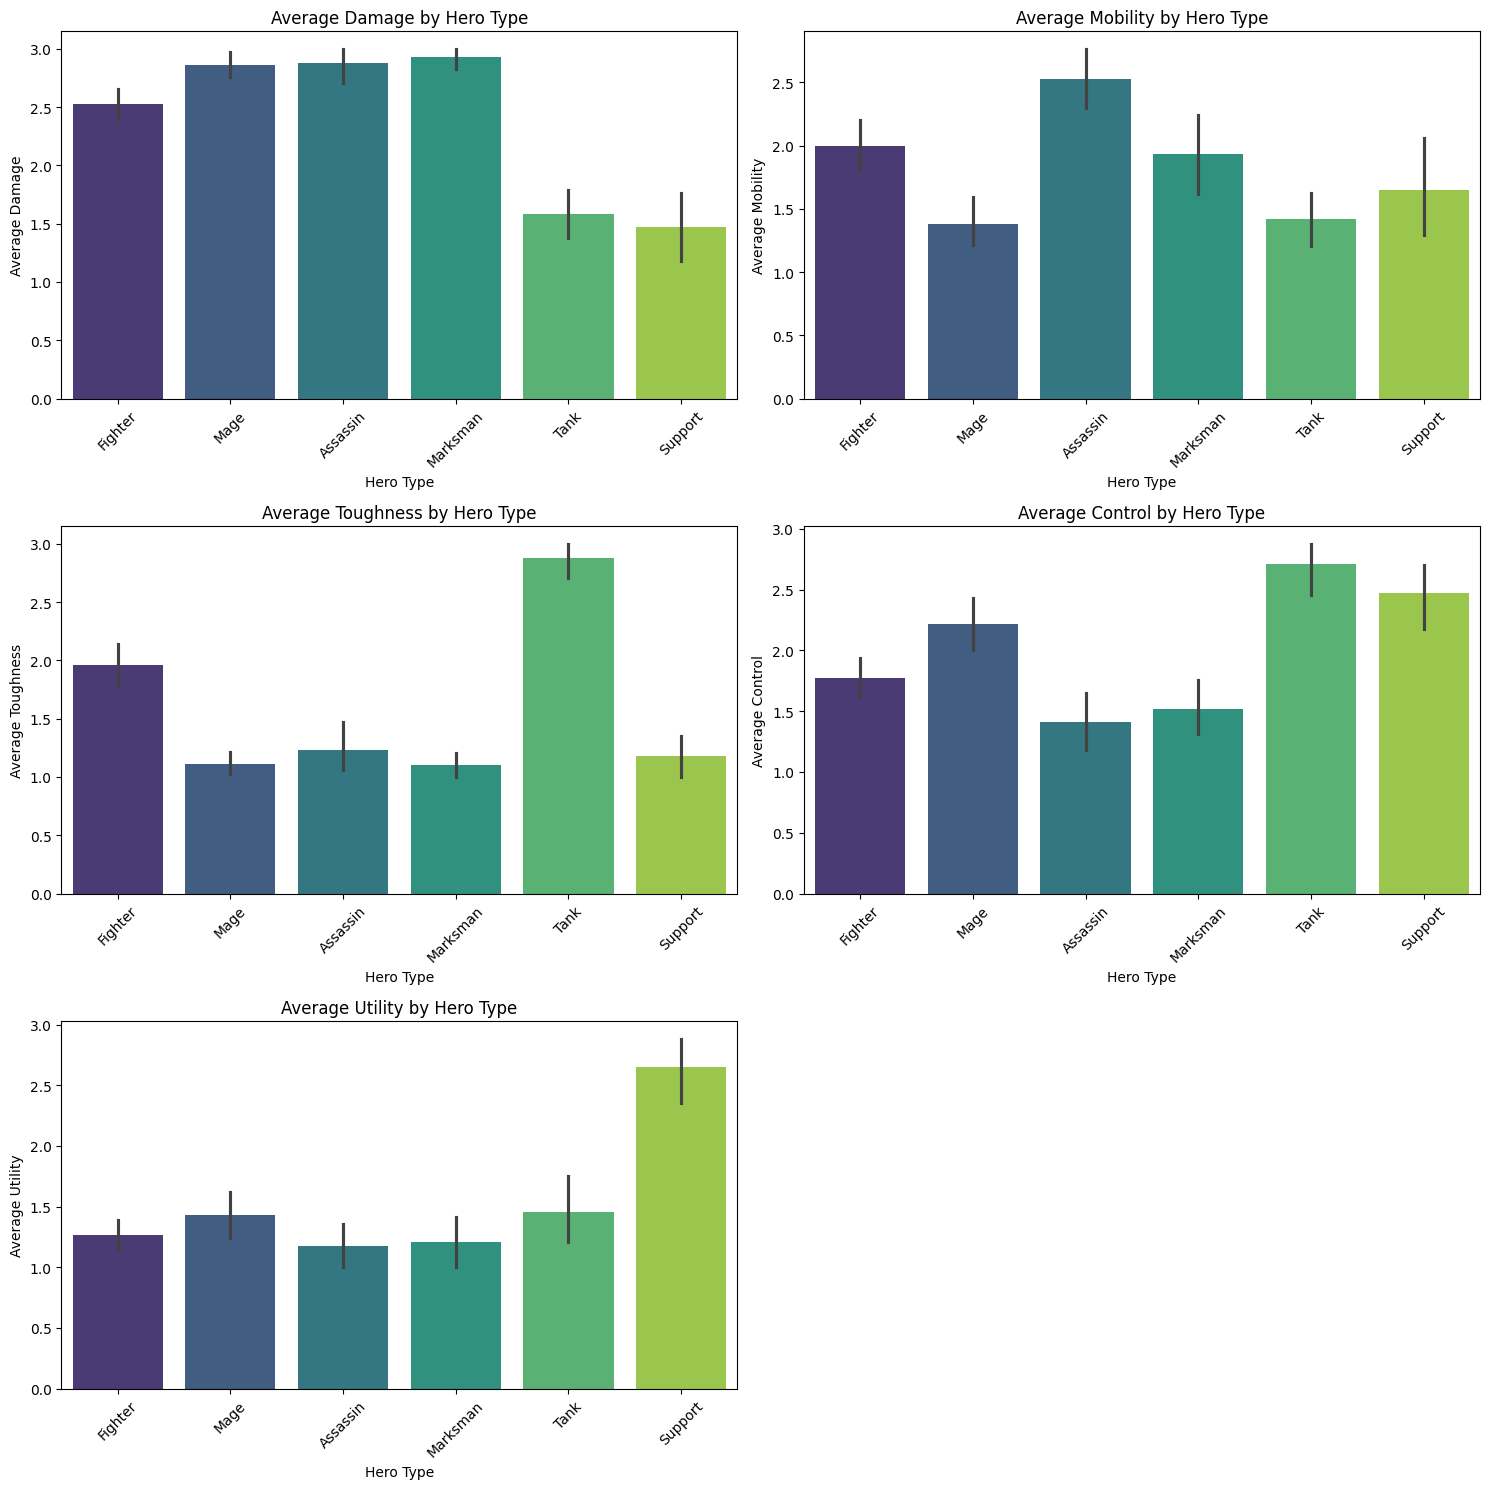

In [44]:


# Define the columns to create bar charts for
columns_to_plot = ['herotype', 'difficulty', 'role', 'rangetype', 'adaptivetype']

# Determine the number of rows and columns for the grid
n_cols_cat = 2
n_rows_cat = (len(columns_to_plot) + n_cols_cat - 1) // n_cols_cat

# Create subplots for categorical columns
fig_cat, axes_cat = plt.subplots(n_rows_cat, n_cols_cat, figsize=(15, n_rows_cat * 5))
axes_cat = axes_cat.flatten() # Flatten the 2D array of axes for easy iteration

# Create bar charts for categorical columns
for i, col in enumerate(columns_to_plot):
    sns.countplot(data=final_df, x=col, hue=col, palette='viridis', legend=False, ax=axes_cat[i])
    axes_cat[i].set_title(f'Distribution of Champion {col.capitalize()}')
    axes_cat[i].set_xlabel(col.capitalize())
    axes_cat[i].set_ylabel('Number of Champions')
    axes_cat[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(i + 1, len(axes_cat)):
    fig_cat.delaxes(axes_cat[j])

plt.tight_layout()
plt.show()


# Define the numerical columns to create bar charts for (average per herotype)
numerical_cols_to_plot = ['damage', 'mobility', 'toughness', 'control', 'utility']

# Determine the number of rows and columns for the grid
n_cols_num = 2
n_rows_num = (len(numerical_cols_to_plot) + n_cols_num - 1) // n_cols_num

# Create subplots for numerical columns
fig_num, axes_num = plt.subplots(n_rows_num, n_cols_num, figsize=(15, n_rows_num * 5))
axes_num = axes_num.flatten() # Flatten the 2D array of axes for easy iteration

# Create bar charts for numerical columns (average per herotype)
for i, col in enumerate(numerical_cols_to_plot):
    sns.barplot(data=final_df, x='herotype', y=col, palette='viridis', ax=axes_num[i])
    axes_num[i].set_title(f'Average {col.capitalize()} by Hero Type')
    axes_num[i].set_xlabel('Hero Type')
    axes_num[i].set_ylabel(f'Average {col.capitalize()}')
    axes_num[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(i + 1, len(axes_num)):
    fig_num.delaxes(axes_num[j])


plt.tight_layout()
plt.show()

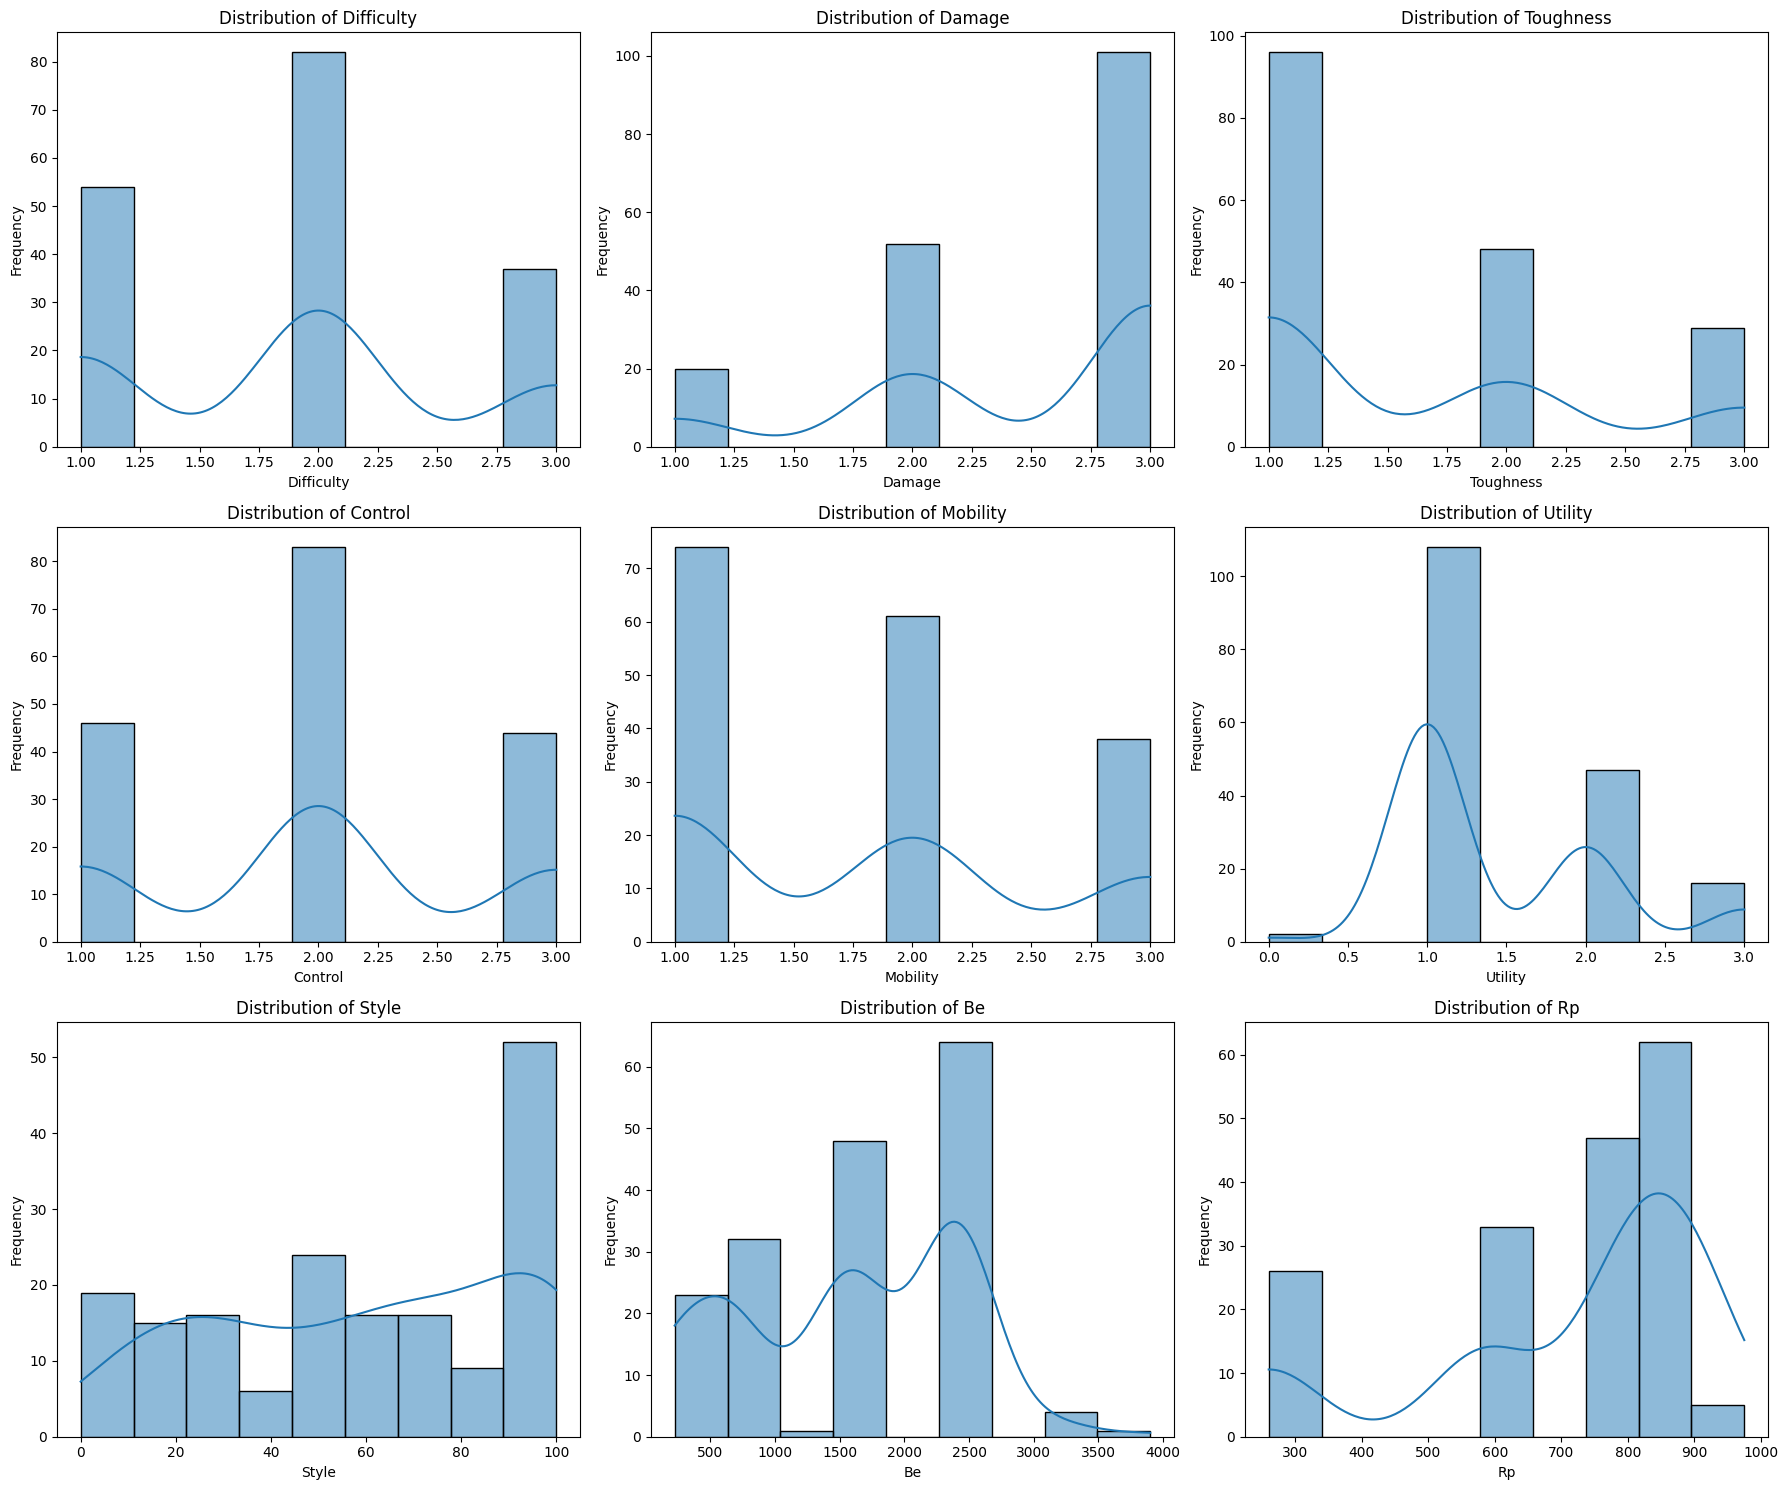

In [45]:
numerical_cols = final_df.select_dtypes(include=np.number).columns.tolist()

# Remove 'id' and 'Unnamed: 0' if they are not relevant for clustering
numerical_cols.remove('id')
# Assuming 'Unnamed: 0' is an index column and not relevant for analysis
if 'Unnamed: 0' in numerical_cols:
    numerical_cols.remove('Unnamed: 0')

# Determine the number of rows and columns for the grid
n_cols_hist = 3
n_rows_hist = (len(numerical_cols) + n_cols_hist - 1) // n_cols_hist

# Create subplots for histograms
fig_hist, axes_hist = plt.subplots(n_rows_hist, n_cols_hist, figsize=(18, n_rows_hist * 5))
axes_hist = axes_hist.flatten() # Flatten the 2D array of axes for easy iteration

# Generate histograms for numerical columns
for i, col in enumerate(numerical_cols):
    sns.histplot(data=final_df, x=col, kde=True, ax=axes_hist[i])
    axes_hist[i].set_title(f'Distribution of {col.capitalize()}')
    axes_hist[i].set_xlabel(col.capitalize())
    axes_hist[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes_hist)):
    fig_hist.delaxes(axes_hist[j])

plt.tight_layout()
plt.show()

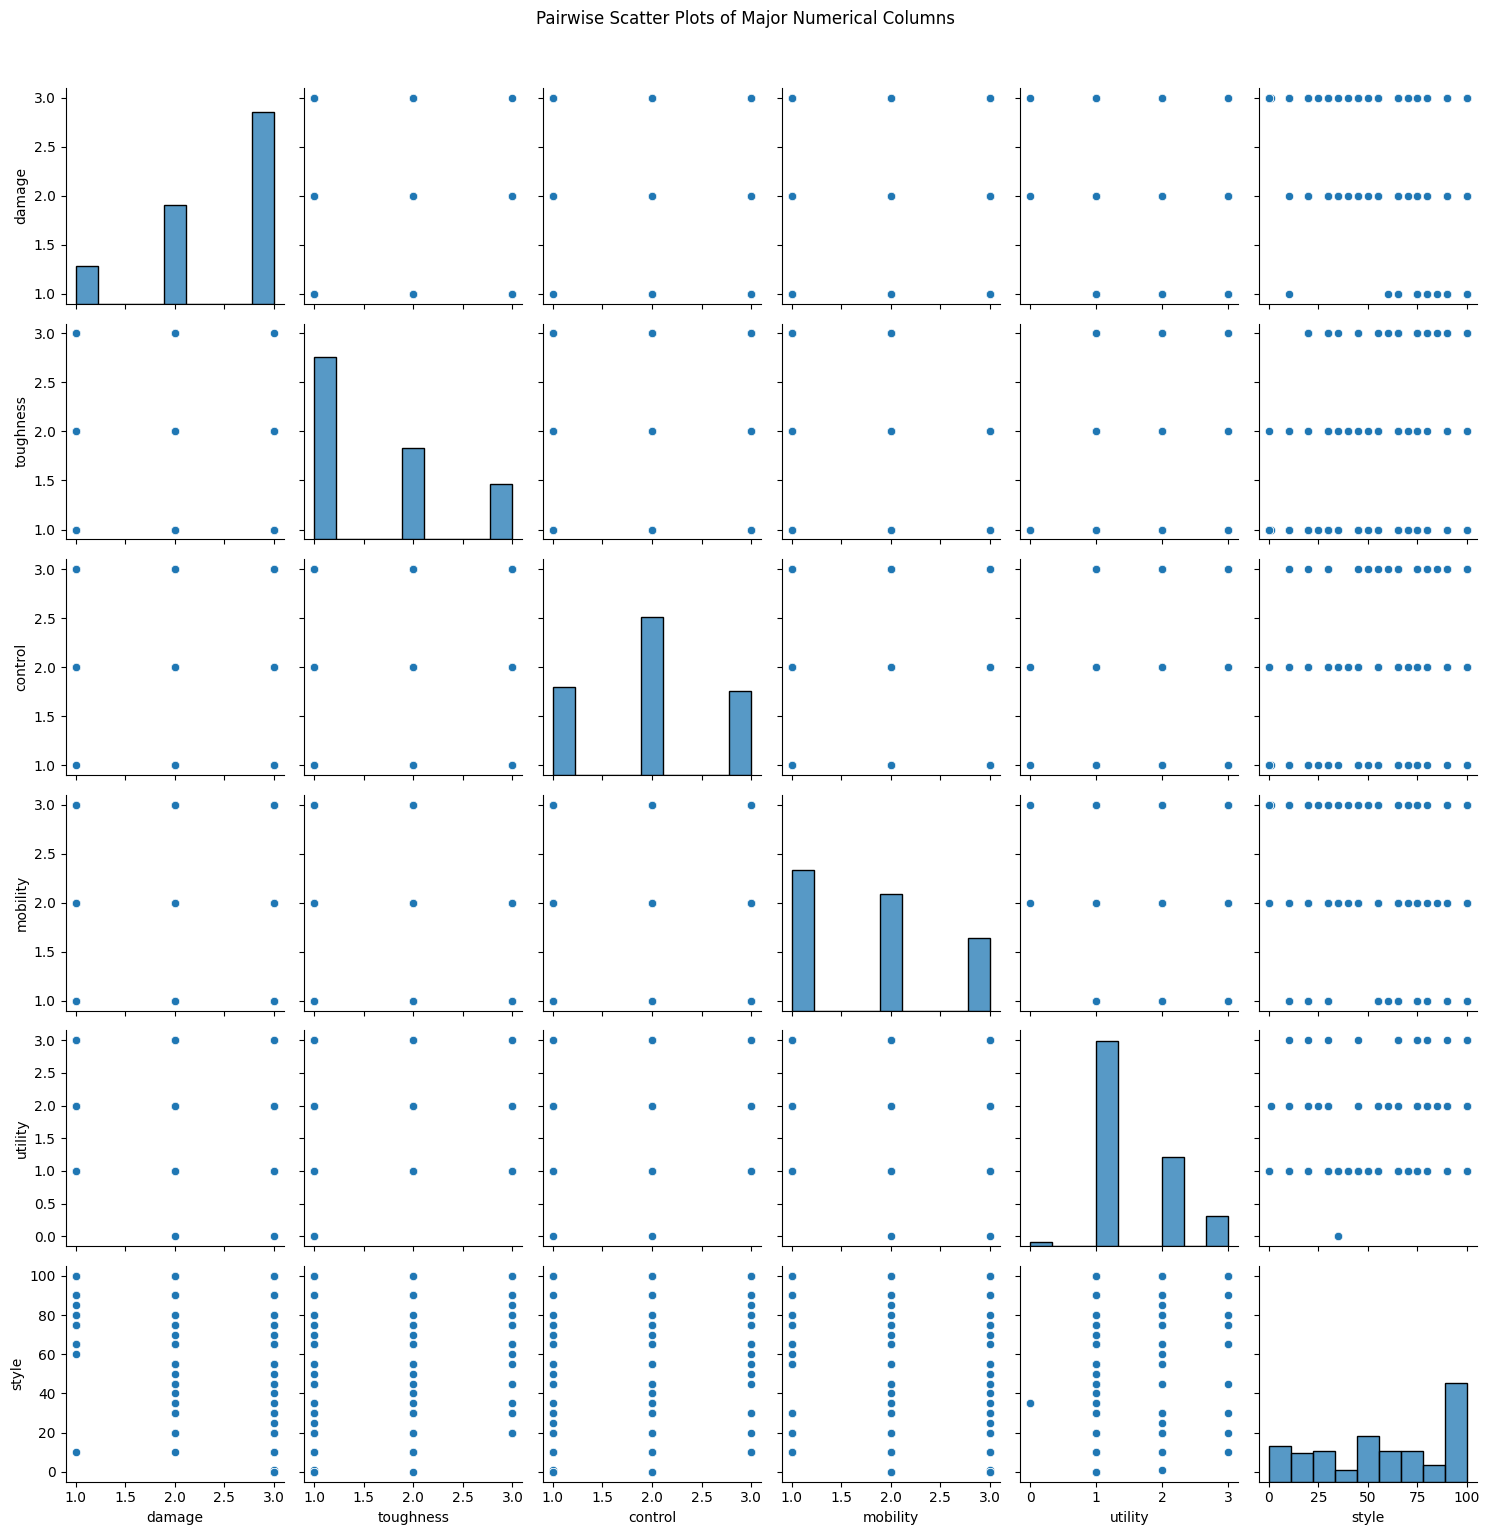

In [46]:
# Select key numerical columns for scatter plots
major_numerical_cols = ['damage', 'toughness', 'control', 'mobility', 'utility', 'style']

# Generate pairwise scatter plots for the selected major numerical columns
sns.pairplot(final_df[major_numerical_cols])
plt.suptitle('Pairwise Scatter Plots of Major Numerical Columns', y=1.02) # Add a title to the plot
plt.tight_layout()
plt.show()

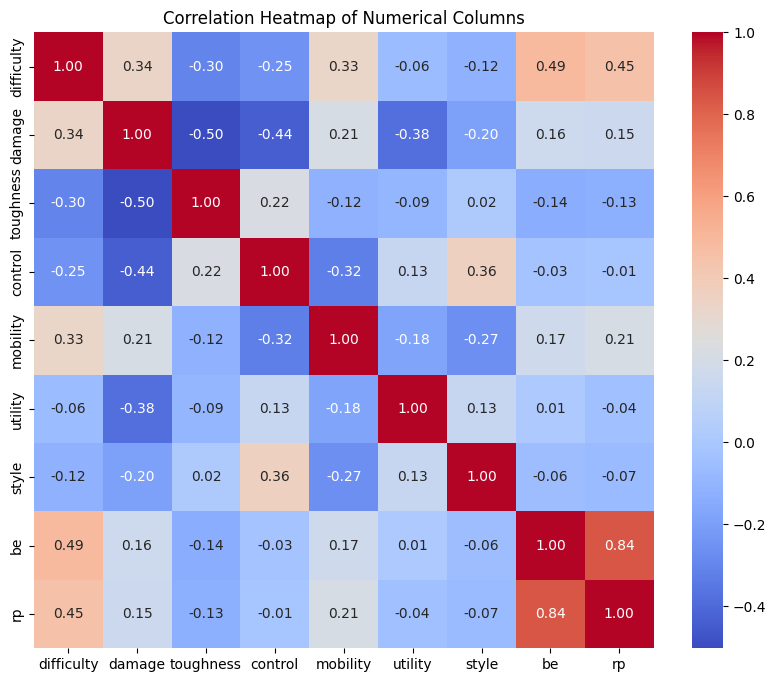

In [47]:
# Select numerical columns, excluding 'id'
numerical_cols = final_df.select_dtypes(include=np.number).columns.tolist()
if 'id' in numerical_cols:
    numerical_cols.remove('id')


# Calculate the correlation matrix
correlation_matrix = final_df[numerical_cols].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()